<a href="https://colab.research.google.com/github/andrelgcardoso/meu_portf-lio/blob/main/%5B1%C2%BA_Projeto%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Londres*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**

(Dados atualizados em 09/03/22)

## Obtenção dos Dados

Os dados usados aqui para análise foram obtidos do [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Nesta análise exploratória usaremos somente o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in London (good for visualisations).*

**Importante**: Os dados do site atualizam com frequência e isso pode causar a quebra do código a depender da data de visualização deste *notebook*.

Por isso, disponibilizamos [aqui](https://www.dropbox.com/s/8dft3a9jtfrpaul/listings.csv?dl=1) os dados utilizados para que seja possível a utilização pós-atualização.

In [ ]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2022-03-09/visualisations/listings.csv')

## Análise dos Dados


Aqui iremos dar contextualização à situação para um melhor entendimento de como estão estruturados os dados.

**Dicionário das variáveis**

* `id` - número de identificação do imóvel;
* `name` - nome do imóvel anunciado;
* `host_id` - número de identificação do proprietário do imóvel;
* `host_name` - nome do anfitrião;
* `neighbourhood_group` - esta coluna não contém um valor válido;
* `neighbourhood` - nome do bairro;
* `latitude` - coordenada da latiturde da propriedade;
* `longitude` - coordenada da longitude da propriedade;
* `room_type` - informa o tipo de quarto que é oferecido;
* `price` - preço de aluguel do imóvel;
* `minimum_nights` - quantidade mínima de noites para reservar;
* `number_of_reviews` - número de reviews do imóvel;
* `last_review` - data do útimo review;
* `reviews_per_month` - quantidade de reviews p/mês;
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião;
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,36299,Kew Gardens 3BR house in cul-de-sac,155938,Geert,NaN,Richmond upon Thames,51.48085,-0.28086,Entire home/apt,195,3,89,2022-03-07,0.64,1,233,10,NaN
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,2020-03-16,0.60,1,9,0,NaN
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,45,2022-01-17,0.34,1,213,3,NaN
3,36660,You are GUARANTEED to love this,157884,Agri & Roger,NaN,Haringey,51.58478,-0.16057,Private room,72,2,550,2022-03-01,3.93,2,236,22,NaN
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Identificaremos, agora, quantas entradas o nosso conjunto de dados possui e ver o tipo das colunas.

Obs.: O *dataset* utilizado é uma versão "resumida" do Airbnb. Na mesma página, há uma versão mais detalhada (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame

print('Variáveis: \t {}'.format(df.shape[1]))
print('Entradas: \t {}\n'.format(df.shape[0]))

# verificar as 5 primeiras entradas do dataset

display(df.dtypes)

Variáveis: 	 18
Entradas: 	 66640



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Para sabermos a qualidade de um dataset, é essencial verificarmos a quantidade de valores ausentes. É importante entender se esses valores nulos são significativos comparados ao total de entradas.

* As colunas `license` e `neighbourhood_group` têm 100% de seus valores faltantes.
* `reviews_per_month` e `last_review` estão com pouco mais de 1/4 de seus valores faltantes.
* `host_name` e `name` estão com menos de 0,1% de seus valores faltantes.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.00000
neighbourhood_group               1.00000
reviews_per_month                 0.27521
last_review                       0.27521
host_name                         0.00048
name                              0.00036
number_of_reviews                 0.00000
number_of_reviews_ltm             0.00000
availability_365                  0.00000
calculated_host_listings_count    0.00000
id                                0.00000
minimum_nights                    0.00000
room_type                         0.00000
longitude                         0.00000
latitude                          0.00000
neighbourhood                     0.00000
host_id                           0.00000
price                             0.00000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Usaremos um histograma para identificarmos a distribuição das variáveis.

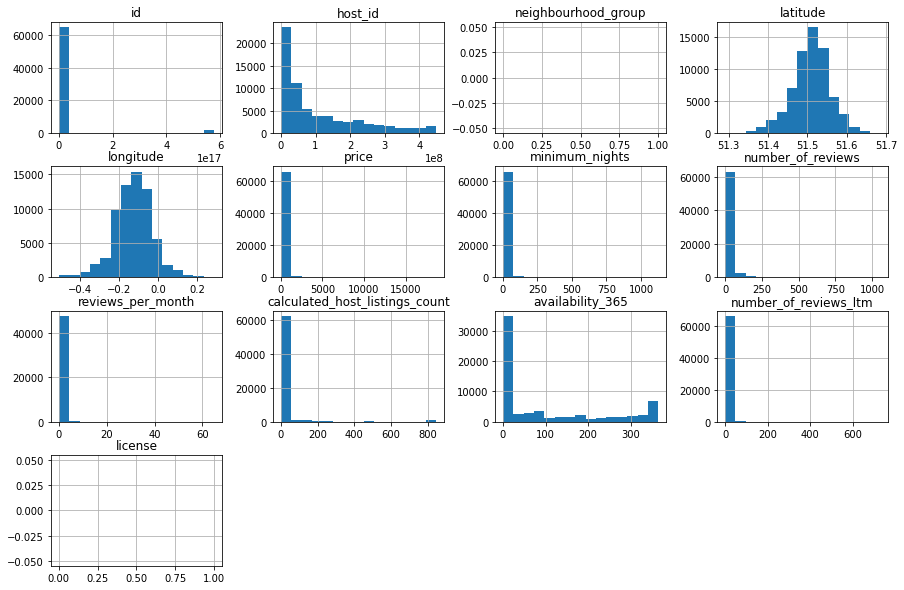

In [ ]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15, 10));

#### **Q3.1. Há outliers presentes?**
É possível notar a presênça de *outliers* pela distribuição do histograma. Veja as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

É possível notar que os valores não estão distribuidos e distorcem a representação gráfica. Temos duas maneiras de ajudar na detecção de *outliers*:

* Resumo estatístico pelo método `describe()`;
* Plotar `boxplots` para a variável.

In [ ]:
# ver resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,66640.000000,66640.000000,66640.000000,48300.000000,66640.00000,66640.000000
mean,145.303316,6.887275,16.035264,0.610475,24.09913,100.488986
std,344.425360,31.129344,37.702634,1.024407,106.27137,131.811969
min,0.000000,1.000000,0.000000,0.010000,1.00000,0.000000
25%,49.000000,1.000000,0.000000,0.090000,1.00000,0.000000
50%,85.000000,2.000000,3.000000,0.290000,1.00000,13.000000
75%,150.000000,4.000000,14.000000,0.760000,4.00000,190.000000
max,18679.000000,1125.000000,1056.000000,64.900000,845.00000,365.000000


Analisando o resumo estatístico acima, podemos confirmar algumas hipóteses:

* A variável `price` possui 75% de seu valor abaixo de 150, mas seu valor máximo é 18679;
* A quantidade `mínima de noites` está acima de 365 dias no ano.

#### **Boxplot para minimum_nights**


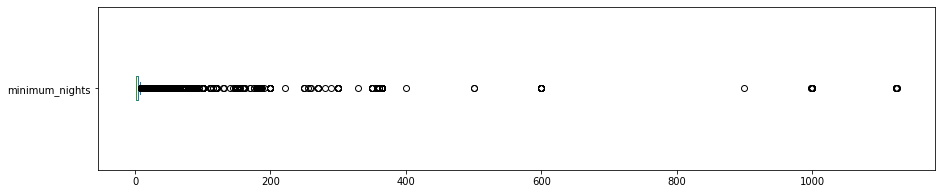

minimum_nights: valores acima de 30 dias
1455 entradas
2.1834%


In [ ]:
# boxplot de minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights

print('minimum_nights: valores acima de 30 dias')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30 ]) / df.shape[0])*100))

Aqui podemos notar que apenas 2,1% da variável `minimum_nights` têm valores acima de 30 dias.

#### **Boxplot para price**

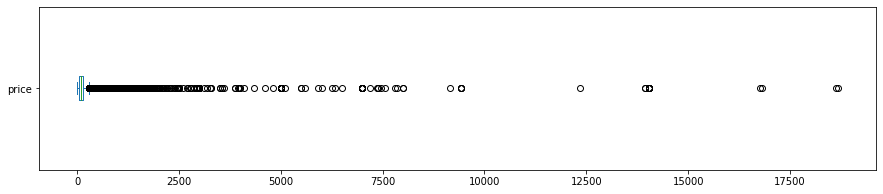


price: valores acima de 750
1356 entradas
2.0348%


In [ ]:
# boxplot de price

df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver a quantidade de valores acima de 750 da variável price

print('\nprice: valores acima de 750')
print('{} entradas'.format(len(df[df.price > 750])))
print('{:.4f}%'.format((len(df[df.price > 750]) / df.shape[0])*100))

E aqui, vemos que apenas 2% da variável `price` têm valores acima de 750.

#### **Histogramas sem outliers**

Agora podemos limpar as variáveis `price` e `minimum_nights` e plotar um novo histograma.

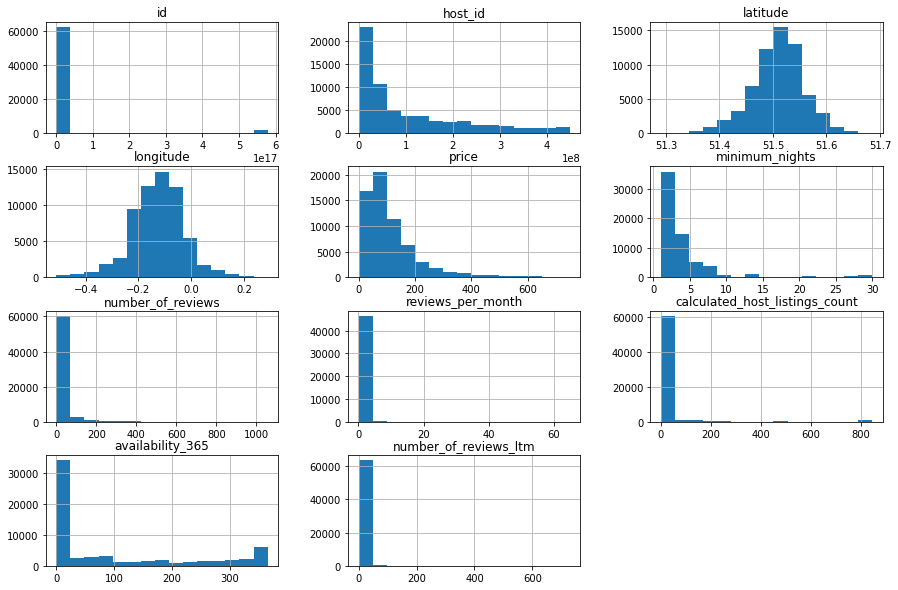

In [ ]:
# remover os OUTLIERS em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 750].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover 'neighbourhood_group' e 'license' pois estão vazios

df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean.drop('license', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas

df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``

print('A média dos preços de aluguel pelo Airbnb em Londres: {}'
      .format(int(df.price.mean())))

A média dos preços de aluguel pelo Airbnb em Londres: 145


A média dos preços de aluguel pelo Airbnb em Londres: 145


### **Q5. Qual a correlação existente entre as variáveis**

Aqui, iremos buscar relação ou semelhança entre duas variáveis do nosso *dataset*.

É possível medir essa relação e estabelecer a intensidade dela pelo coeficiente de correlação. Para isso, vamos:

* Criar uma matriz de correlação;
* Gerar um *heatmap* a partir dessa matriz, utilizando a biblioteca `seaborn`.

In [ ]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.061077,-0.062934,0.004303,0.325673,0.143604
minimum_nights,0.061077,1.000000,-0.072669,-0.103088,-0.003945,0.047988
number_of_reviews,-0.062934,-0.072669,1.000000,0.598455,-0.056017,0.066260
reviews_per_month,0.004303,-0.103088,0.598455,1.000000,-0.029553,0.204898
calculated_host_listings_count,0.325673,-0.003945,-0.056017,-0.029553,1.000000,0.004071
availability_365,0.143604,0.047988,0.066260,0.204898,0.004071,1.000000


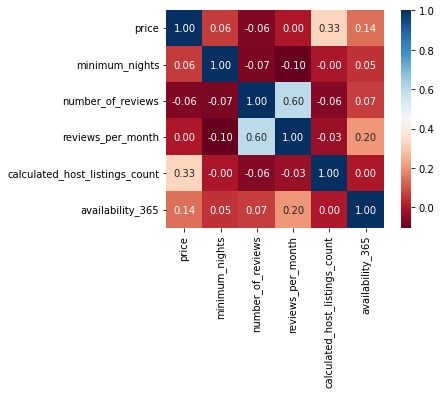

In [ ]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Neste caso, praticamente não há correlações positivas. Podemos, no máximo, criar hipóteses.

Por exemplo, as variáveis `calculated_host_listings_count` e `price` aparecem com uma correlação próxima ao neutro. Isso pode significar, talvez, que imóveis de um mesmo proprietário podem ter preços semelhantes.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Na coluna `room_type`, podemos ver o tipo de locação que está anunciada. Existem opções de casas/apartamentos, quartos, quartos compartilhados e quartos de hotel. Veremos a quantidade de cada um com a função `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    35908
Private room       27199
Shared room          477
Hotel room           287
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.562196
Private room       0.425843
Shared room        0.007468
Hotel room         0.004493
Name: room_type, dtype: float64

Podemos ver acima que alugueis de casas/apartamentos e quartos privados contêm por volta de 56% e 42%, respectivamente. Enquanto quartos compartilhados e quartos de hotel contêm por volta de 1%.

### **Q7. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Kensington and Chelsea    180.581840
Westminster               177.984715
City of London            164.746770
Camden                    136.458883
Richmond upon Thames      130.855480
Hammersmith and Fulham    126.912966
Wandsworth                124.048884
Islington                 111.962192
Merton                    111.500466
Southwark                 102.097642
Name: price, dtype: float64

Com uma rápida pesquisa no Google, podemos ver que os bairros mais caros de londres são, dentre eles:

* `Kensington e Chelsea`;
* `Westminster`;
* `Camden`;
* `Hammersmith e Fulham`;
* `Richmond Upon Thames`.

Podemos notar que esses bairros não aparecem nessa ordem em nossa média. Isso se deve ao fato de que há muitos alugueis nesses bairros, e relativamente pouco nos demais, isso causa o estreitamento de nosso cálculo de média.

Comparemos, por exemplo, o número de alugueis em `Westminster` e `City of London`:

In [ ]:
# quantidade de imóveis em Westminster

print(df_clean[df_clean.neighbourhood == 'Westminster'].shape)

(6477, 16)


In [ ]:
# ver quantidade de imóveis em City of London

print(df_clean[df_clean.neighbourhood == "City of London"].shape)

(387, 16)


> Enquanto o bairro de Westminster possui mais de 6 mil imóveis disponíveis, City of London contém apenas 387.





Pelas informações de Latitude e Longitude dos dados, podemos plotar cada ponto.

Para isso, consideremos `x=longitude` e `y=latitude`.

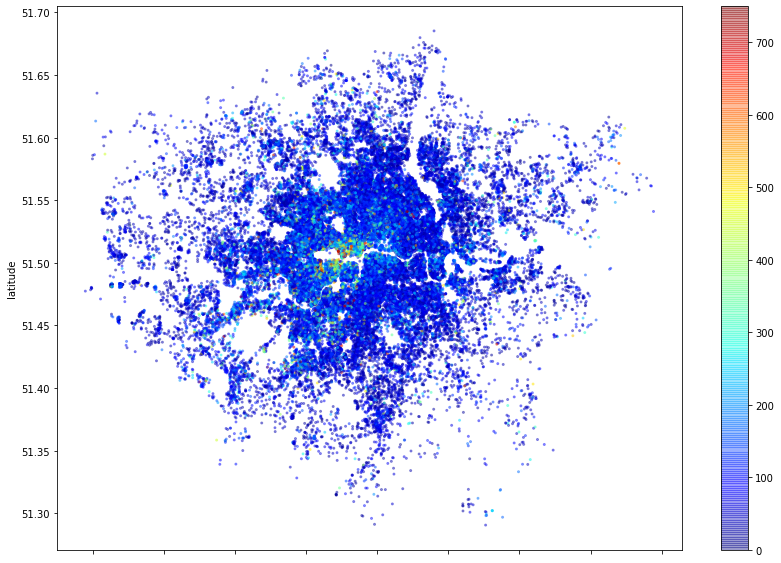

In [ ]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=4,
              cmap=plt.get_cmap('jet'), figsize=(14,10));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

print('A média do mínimo de noites dos alugueis de Londres pelo Airbnb são de: {} {}'
      .format(int(df.minimum_nights.mean()), 'noites'))

A média do mínimo de noites dos alugueis de Londres pelo Airbnb são de: 6 noites


A média do mínimo de noites dos alugueis de Londres pelo Airbnb são de: 6 noites

## Conclusões

Após a análise de dados do Airbnb de Londres, podemos concluir que a cidade possui milhares de imóveis para alugar, sendo 56% casas ou apartamentos, 42% quartos privados e menos de 1% de quartos compartilhados e de hoteis - lembrando que são dados do `Airbnb` e não da totalidade das empresas hoteleiras que atuam em Londres.

Dentre as opções, as mais caras estão entre os bairros de *Kensington and Chelsea*, *Westminster* e *Camden*, com média de preços acima de *R$850 (£150)*. Nesses bairros, há também uma grande variedade de opções, ja que Westminster, por exemplo, conta com mais de 6 mil opções para alugar.
